# Creating Data

In [1]:
import numpy as np
import random

side_length = 8
x = np.zeros(64)
for i in range(len(x)):
  if random.random() < 0.1:
    x[i] = 1

x = x.reshape([side_length,side_length])
x = np.pad(x, ((2,2),(2,2)), 'constant')
x2 = np.zeros((side_length + 4)*(side_length + 4) )
x2 = x2.reshape([side_length + 4,side_length + 4])

for i in range(2, side_length + 2):
  for j in range(2, side_length + 2):
    if x[i,j] == 1:
      x2[i,j] += 0.2
      x2[i-1,j] += 0.1
      x2[i-1,j-1] += 0.1
      x2[i,j-1] += 0.1
      x2[i+1,j-1] += 0.1
      x2[i+1,j] += 0.1
      x2[i+1,j+1] += 0.1
      x2[i,j+1] += 0.1
      x2[i-1,j+1] += 0.1

In [2]:
x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

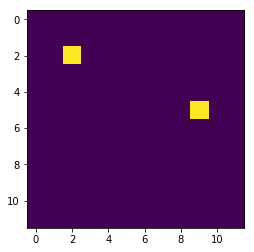

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x)

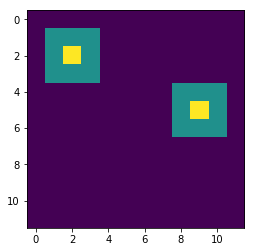

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x2)

In [6]:
def create_data_point():
  side_length = 8
  image = np.zeros(64)
  for i in range(len(image)):
    if random.random() < 0.1:
      image[i] = 1

  image = image.reshape([side_length,side_length])
  image = np.pad(image, ((2,2),(2,2)), 'constant')
  gt = np.zeros((side_length + 4)*(side_length + 4) )
  gt = gt.reshape([side_length + 4, side_length + 4])
  for i in range(side_length + 4):
    for k in range(side_length + 4):
      if image[i,k] == 1:
        gt[i,k] += 0.2
        gt[i-1,k] += 0.1
        gt[i-1,k-1] += 0.1
        gt[i,k-1] += 0.1
        gt[i+1,k-1] += 0.1
        gt[i+1,k] += 0.1
        gt[i+1,k+1] += 0.1
        gt[i,k+1] += 0.1
        gt[i-1,k+1] += 0.1
        
    
  return image, gt

In [7]:
image,gt = create_data_point()

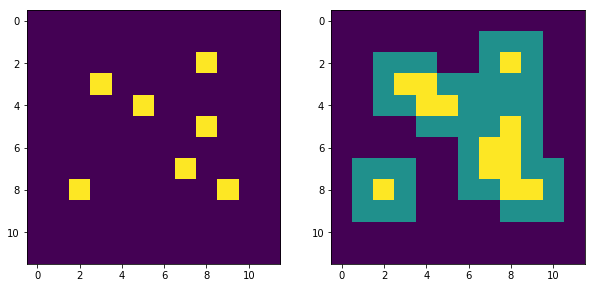

In [8]:
fig = plt.figure(figsize = (10,10))

ax = plt.subplot(1,2,1)
plt.imshow(image)

ax = plt.subplot(1,2,2)
plt.imshow(gt)

In [9]:
x_train = []
y_train = []

for i in range(1000):
  image, gt = create_data_point()
  x_train.append(image)
  y_train.append(gt)

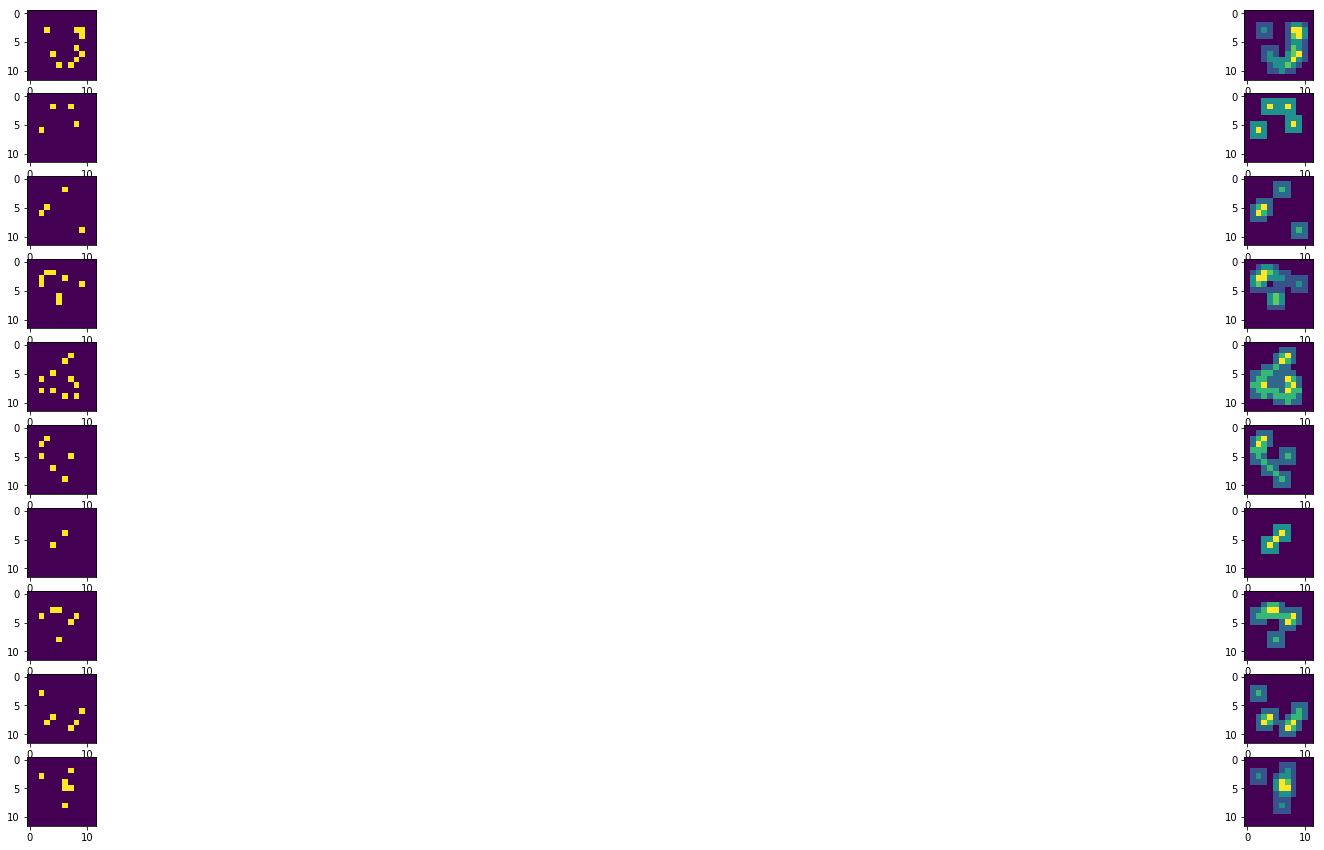

In [10]:
fig = plt.figure(figsize = (40,15))

for i in range(10):
  ax = plt.subplot(10, 2, 2 * i + 1)
  plt.imshow(x_train[i])
  
  ax = plt.subplot(10, 2, 2 * (i + 1) )
  plt.imshow(y_train[i])

In [11]:
import numpy as np
np.save('xtrain.npy', x_train)
np.save('y_train.npy', y_train)